In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
solar1 = pd.read_csv("Solar 1.csv")

In [3]:
solar1

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2018-12-31 13:00:00,2018,12,31,13,0,Solar1
1,4,0.00,2018-12-31 14:00:00,2018,12,31,14,0,Solar1
2,8,0.00,2018-12-31 15:00:00,2018,12,31,15,0,Solar1
3,12,0.00,2018-12-31 16:00:00,2018,12,31,16,0,Solar1
4,16,0.00,2018-12-31 17:00:00,2018,12,31,17,0,Solar1
...,...,...,...,...,...,...,...,...,...
16086,64344,0.01,2020-10-31 19:00:00,2020,10,31,19,0,Solar1
16087,64348,0.42,2020-10-31 20:00:00,2020,10,31,20,0,Solar1
16088,64352,1.27,2020-10-31 21:00:00,2020,10,31,21,0,Solar1
16089,64356,2.35,2020-10-31 22:00:00,2020,10,31,22,0,Solar1


In [4]:
solar1['datetime']=pd.to_datetime(solar1['datetime'], format='%Y-%m-%d %H:%M:%S')

solar1= solar1.set_index('datetime')

solar1= solar1.asfreq('H') 


<AxesSubplot:xlabel='datetime'>

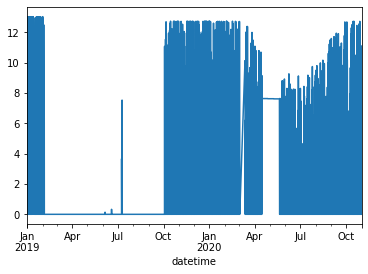

In [5]:
solar1["series_value"].plot()

In [6]:
'''
start_train='2019-10-01 00:00'
end_train='2020-06-01 00:00'
start_val='2020-06-01 01:00'
end_val='2020-07-31 23:00'

start_test='2020-08-01 00:00'

'''
end_train='2020-07-31 23:00'
start_test='2020-08-01 00:00'

solar1train = solar1.loc[:end_train,:]
solar1test=solar1.loc[start_test:, :]


In [7]:
solar1train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2018-12-31 13:00:00,0,0.00,2018,12,31,13,0,Solar1
2018-12-31 14:00:00,4,0.00,2018,12,31,14,0,Solar1
2018-12-31 15:00:00,8,0.00,2018,12,31,15,0,Solar1
2018-12-31 16:00:00,12,0.00,2018,12,31,16,0,Solar1
2018-12-31 17:00:00,16,0.00,2018,12,31,17,0,Solar1
...,...,...,...,...,...,...,...,...
2020-07-31 19:00:00,55512,0.00,2020,7,31,19,0,Solar1
2020-07-31 20:00:00,55516,0.00,2020,7,31,20,0,Solar1
2020-07-31 21:00:00,55520,0.02,2020,7,31,21,0,Solar1


In [8]:
solar1test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-08-01 00:00:00,55532,3.25,2020,8,1,0,0,Solar1
2020-08-01 01:00:00,55536,8.57,2020,8,1,1,0,Solar1
2020-08-01 02:00:00,55540,9.49,2020,8,1,2,0,Solar1
2020-08-01 03:00:00,55544,9.37,2020,8,1,3,0,Solar1
2020-08-01 04:00:00,55548,8.22,2020,8,1,4,0,Solar1
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,64344,0.01,2020,10,31,19,0,Solar1
2020-10-31 20:00:00,64348,0.42,2020,10,31,20,0,Solar1
2020-10-31 21:00:00,64352,1.27,2020,10,31,21,0,Solar1


In [9]:
train_s1 = solar1train.reset_index()[["datetime","series_value"]]
train_s1.columns=["ds","y"]
train_s1

,ds,y
0,2018-12-31 13:00:00,0.00
1,2018-12-31 14:00:00,0.00
2,2018-12-31 15:00:00,0.00
3,2018-12-31 16:00:00,0.00
4,2018-12-31 17:00:00,0.00
...,...,...
13878,2020-07-31 19:00:00,0.00
13879,2020-07-31 20:00:00,0.00
13880,2020-07-31 21:00:00,0.02
13881,2020-07-31 22:00:00,1.53


In [10]:
model_s1 = Prophet()
model_s1.fit(train_s1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_s1 = model_s1.make_future_dataframe(periods=2208,freq="H")
future_s1
# end : 2020-10-31 23:00:00


,ds
0,2018-12-31 13:00:00
1,2018-12-31 14:00:00
2,2018-12-31 15:00:00
3,2018-12-31 16:00:00
4,2018-12-31 17:00:00
...,...
16086,2020-10-31 19:00:00
16087,2020-10-31 20:00:00
16088,2020-10-31 21:00:00
16089,2020-10-31 22:00:00


In [12]:
forecast_s1 = model_s1.predict(future_s1)
forecast_s1
#forecast_s1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-31 13:00:00,4.536529,0.016566,6.533977,4.536529,4.536529,-1.379355,-1.379355,-1.379355,-1.361743,-1.361743,-1.361743,-0.017612,-0.017612,-0.017612,0.0,0.0,0.0,3.157174
1,2018-12-31 14:00:00,4.533453,0.078003,6.474590,4.533453,4.533453,-1.424540,-1.424540,-1.424540,-1.411926,-1.411926,-1.411926,-0.012614,-0.012614,-0.012614,0.0,0.0,0.0,3.108913
2,2018-12-31 15:00:00,4.530376,0.102474,6.437083,4.530376,4.530376,-1.401478,-1.401478,-1.401478,-1.394057,-1.394057,-1.394057,-0.007421,-0.007421,-0.007421,0.0,0.0,0.0,3.128898
3,2018-12-31 16:00:00,4.527300,-0.066997,6.592969,4.527300,4.527300,-1.336462,-1.336462,-1.336462,-1.334393,-1.334393,-1.334393,-0.002069,-0.002069,-0.002069,0.0,0.0,0.0,3.190838
4,2018-12-31 17:00:00,4.524223,0.011724,6.539758,4.524223,4.524223,-1.316912,-1.316912,-1.316912,-1.320317,-1.320317,-1.320317,0.003405,0.003405,0.003405,0.0,0.0,0.0,3.207311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16086,2020-10-31 19:00:00,-2.486490,-7.887406,0.044064,-4.622088,-0.431148,-1.390038,-1.390038,-1.390038,-1.385313,-1.385313,-1.385313,-0.004725,-0.004725,-0.004725,0.0,0.0,0.0,-3.876528
16087,2020-10-31 20:00:00,-2.487970,-7.716295,0.241558,-4.624360,-0.431035,-1.151676,-1.151676,-1.151676,-1.147822,-1.147822,-1.147822,-0.003854,-0.003854,-0.003854,0.0,0.0,0.0,-3.639646
16088,2020-10-31 21:00:00,-2.489450,-6.885466,0.826203,-4.626632,-0.430922,-0.542556,-0.542556,-0.542556,-0.539203,-0.539203,-0.539203,-0.003353,-0.003353,-0.003353,0.0,0.0,0.0,-3.032006
16089,2020-10-31 22:00:00,-2.490930,-6.169057,1.918097,-4.628903,-0.430809,0.372439,0.372439,0.372439,0.375662,0.375662,0.375662,-0.003223,-0.003223,-0.003223,0.0,0.0,0.0,-2.118491


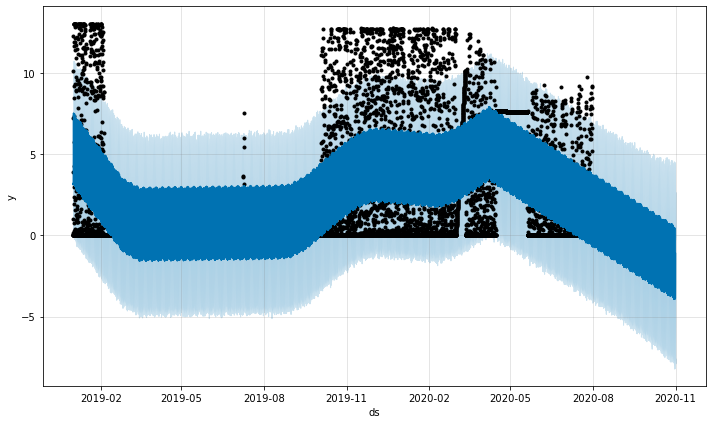

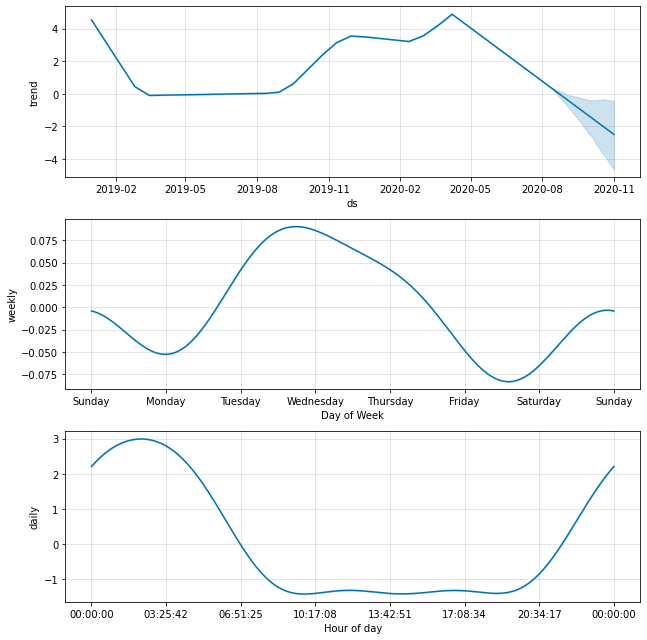

In [13]:
# plot the prediction 
fig= model_s1.plot(forecast_s1)
#plot predictions 
fig= model_s1.plot_components(forecast_s1)

In [14]:
forecast_s1["additive_terms"]
additive_terms =  pd.DataFrame(forecast_s1["additive_terms"])
print(additive_terms)

solar1["series_value"]
actual_value = pd.DataFrame(solar1.reset_index()["series_value"])
actual_value
print(actual_value)

       additive_terms
0           -1.379355
1           -1.424540
2           -1.401478
3           -1.336462
4           -1.316912
...               ...
16086       -1.390038
16087       -1.151676
16088       -0.542556
16089        0.372439
16090        1.368245

[16091 rows x 1 columns]
       series_value
0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
...             ...
16086          0.01
16087          0.42
16088          1.27
16089          2.35
16090          5.88

[16091 rows x 1 columns]


In [15]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(solar1.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_s1["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2018-12-31 13:00:00,1.379355,-1.379355,0.00
1,2018-12-31 14:00:00,1.424540,-1.424540,0.00
2,2018-12-31 15:00:00,1.401478,-1.401478,0.00
3,2018-12-31 16:00:00,1.336462,-1.336462,0.00
4,2018-12-31 17:00:00,1.316912,-1.316912,0.00
...,...,...,...,...
16086,2020-10-31 19:00:00,1.400038,-1.390038,0.01
16087,2020-10-31 20:00:00,1.571676,-1.151676,0.42
16088,2020-10-31 21:00:00,1.812556,-0.542556,1.27
16089,2020-10-31 22:00:00,1.977561,0.372439,2.35


In [16]:
output.to_csv("s1_actual_additive.csv",index=False)